In [1]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted

In [2]:
remaining_df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/remaining_V7_2M.json', orient='records')

In [3]:
remaining_df.shape

(2000000, 5)

In [4]:
remaining_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1619101097,Trump was right!\n\n,1619101357,👍🏼,AnalyzingAmerica.json
1,1694793681,☀️ Watch: Hundreds Baptized in Pond at Auburn ...,1694795420,Proud to see this come from my home state. ❤️❤️❤️,ResisttheMainstream.json
2,1691129131,Yes or no?,1691135245,Bearing false witness. Where have I heard that...,ResisttheMainstream.json
3,1669335266,A d h d m o m e n t,1669335694,"when will you get addy, btw? high time you did",LacansWhreHouse.json
4,1696197725,,1696198531,"If you workin' dat ass, that still counts as w...",AnticapitalistSurrealism.json


In [5]:
len(remaining_df['telegramChannel'].unique())

17

In [6]:
remaining_df['telegramChannel'].value_counts()

ResisttheMainstream.json         482596
AnalyzingAmerica.json            300406
ThePatriotVoice.json             166986
TheTrumpRepublicans.json         160603
TrumpSupportersChannel.json      149506
DonaldTrumpJr.json               146081
PatriotStreetfighter.json        116114
AnticapitalistSurrealism.json     84400
RiotDogs.json                     83182
LacansWhreHouse.json              82923
PrayingMedic.json                 73388
UnitedAnarchists.json             59517
COVIDVACCINEVICTIMS.json          49342
InfoWars.json                     17602
FreedomFighters.json              15080
AlexJones.json                    11063
BlackCrimesMatter.json             1211
Name: telegramChannel, dtype: int64

In [7]:
remaining_df.groupby('telegramChannel')['reply'].count()

telegramChannel
AlexJones.json                    11063
AnalyzingAmerica.json            300406
AnticapitalistSurrealism.json     84400
BlackCrimesMatter.json             1211
COVIDVACCINEVICTIMS.json          49342
DonaldTrumpJr.json               146081
FreedomFighters.json              15080
InfoWars.json                     17602
LacansWhreHouse.json              82923
PatriotStreetfighter.json        116114
PrayingMedic.json                 73388
ResisttheMainstream.json         482596
RiotDogs.json                     83182
ThePatriotVoice.json             166986
TheTrumpRepublicans.json         160603
TrumpSupportersChannel.json      149506
UnitedAnarchists.json             59517
Name: reply, dtype: int64

In [8]:
sum(remaining_df.groupby('telegramChannel')['reply'].count())

2000000

In [9]:
remaining_df.shape

(2000000, 5)

In [10]:
# Remove 'msgDate' and 'text' columns
df = remaining_df.drop(columns=['msgDate', 'msg'])
# Rename
# df = df.rename(columns={'FinalLabel': 'Label'})
# df = df.rename(columns={'text': 'reply'})

In [11]:
df.shape

(2000000, 3)

In [12]:
df.head(1)

,replyDate,reply,telegramChannel
0,1619101357,👍🏼,AnalyzingAmerica.json


In [13]:
df.groupby('telegramChannel')['reply'].count()

telegramChannel
AlexJones.json                    11063
AnalyzingAmerica.json            300406
AnticapitalistSurrealism.json     84400
BlackCrimesMatter.json             1211
COVIDVACCINEVICTIMS.json          49342
DonaldTrumpJr.json               146081
FreedomFighters.json              15080
InfoWars.json                     17602
LacansWhreHouse.json              82923
PatriotStreetfighter.json        116114
PrayingMedic.json                 73388
ResisttheMainstream.json         482596
RiotDogs.json                     83182
ThePatriotVoice.json             166986
TheTrumpRepublicans.json         160603
TrumpSupportersChannel.json      149506
UnitedAnarchists.json             59517
Name: reply, dtype: int64

In [24]:
df.to_json('/home/ravi/raviProject/DATA/Annotate/Unlabeled_2M.json', orient='records')

## make new iter7 labeled data

In [12]:
sampled_df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter7_Labeled_15077_sampled_forNextIter.json', orient='records')

In [13]:
sampled_df.shape

(15077, 6)

In [14]:
sampled_df.head(5)

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
0,1687098334,Raskin is in the top 5 Dem scum bags in DC. He...,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2
1,1698079227,🔴 CDC Issues Warning About ‘Potentially Disfi...,1698117741,Can we please get to the EXECUTIONS ALREADY 🖕🏽💀💩,ResisttheMainstream.json,2
2,1683948022,Do you approve? 💬,1684179732,Can't trust Musk as far u can shoot that fucki...,ResisttheMainstream.json,2
3,1623338789,Donald Trump Jr. Rips Hunter Biden For Using t...,1623339801,There are so many criminals in America dishone...,TheTrumpRepublicans.json,2
4,1685904022,🔴 Here Are The 17 GOP Senators Who Voted For ...,1685904529,"Traitors all, hang ‘em high",ResisttheMainstream.json,2


In [15]:
len(sampled_df['telegramChannel'].unique())

18

In [16]:
sampled_df['telegramChannel'].value_counts()

ResisttheMainstream.json         4505
AnalyzingAmerica.json            4255
TheTrumpRepublicans.json         1774
TrumpSupportersChannel.json      1414
ThePatriotVoice.json              825
DonaldTrumpJr.json                634
PatriotStreetfighter.json         387
AnticapitalistSurrealism.json     192
PrayingMedic.json                 176
RiotDogs.json                     170
COVIDVACCINEVICTIMS.json          153
UnitedAnarchists.json             143
InfoWars.json                     143
LacansWhreHouse.json              131
FreedomFighters.json               95
AlexJones.json                     72
BlackCrimesMatter.json              7
False                               1
Name: telegramChannel, dtype: int64

In [18]:
sampled_df.groupby('telegramChannel')['text'].count()

telegramChannel
AlexJones.json                     72
AnalyzingAmerica.json            4255
AnticapitalistSurrealism.json     192
BlackCrimesMatter.json              7
COVIDVACCINEVICTIMS.json          153
DonaldTrumpJr.json                634
False                               1
FreedomFighters.json               95
InfoWars.json                     143
LacansWhreHouse.json              131
PatriotStreetfighter.json         387
PrayingMedic.json                 176
ResisttheMainstream.json         4505
RiotDogs.json                     170
ThePatriotVoice.json              825
TheTrumpRepublicans.json         1774
TrumpSupportersChannel.json      1414
UnitedAnarchists.json             143
Name: text, dtype: int64

In [21]:
# Extract rows where 'telegramChannel' column has the value 'False'
filtered_df = sampled_df[sampled_df['telegramChannel'] == 'False']

print(filtered_df)

     msgDate                               msg   replyDate  \
848        1   it’s a decree. Do not comply!!!  1693486255   

                         text telegramChannel  FinalLabel  
848  A ‘mandate’ is not a law           False           0  


In [22]:
# Remove rows where 'telegramChannel' column has the value 'False'
filtered_df = sampled_df[sampled_df['telegramChannel'] != 'False']

In [23]:
filtered_df.shape

(15076, 6)

In [24]:
filtered_df.head(5)

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
0,1687098334,Raskin is in the top 5 Dem scum bags in DC. He...,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2
1,1698079227,🔴 CDC Issues Warning About ‘Potentially Disfi...,1698117741,Can we please get to the EXECUTIONS ALREADY 🖕🏽💀💩,ResisttheMainstream.json,2
2,1683948022,Do you approve? 💬,1684179732,Can't trust Musk as far u can shoot that fucki...,ResisttheMainstream.json,2
3,1623338789,Donald Trump Jr. Rips Hunter Biden For Using t...,1623339801,There are so many criminals in America dishone...,TheTrumpRepublicans.json,2
4,1685904022,🔴 Here Are The 17 GOP Senators Who Voted For ...,1685904529,"Traitors all, hang ‘em high",ResisttheMainstream.json,2


In [25]:
len(filtered_df['telegramChannel'].unique())

17

In [26]:
filtered_df['telegramChannel'].value_counts()

ResisttheMainstream.json         4505
AnalyzingAmerica.json            4255
TheTrumpRepublicans.json         1774
TrumpSupportersChannel.json      1414
ThePatriotVoice.json              825
DonaldTrumpJr.json                634
PatriotStreetfighter.json         387
AnticapitalistSurrealism.json     192
PrayingMedic.json                 176
RiotDogs.json                     170
COVIDVACCINEVICTIMS.json          153
InfoWars.json                     143
UnitedAnarchists.json             143
LacansWhreHouse.json              131
FreedomFighters.json               95
AlexJones.json                     72
BlackCrimesMatter.json              7
Name: telegramChannel, dtype: int64

In [27]:
filtered_df.groupby('telegramChannel')['text'].count()

telegramChannel
AlexJones.json                     72
AnalyzingAmerica.json            4255
AnticapitalistSurrealism.json     192
BlackCrimesMatter.json              7
COVIDVACCINEVICTIMS.json          153
DonaldTrumpJr.json                634
FreedomFighters.json               95
InfoWars.json                     143
LacansWhreHouse.json              131
PatriotStreetfighter.json         387
PrayingMedic.json                 176
ResisttheMainstream.json         4505
RiotDogs.json                     170
ThePatriotVoice.json              825
TheTrumpRepublicans.json         1774
TrumpSupportersChannel.json      1414
UnitedAnarchists.json             143
Name: text, dtype: int64

In [28]:
filtered_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter7_Labeled_15076_sampled_forNextIter.json', orient='records')

# new

In [14]:
df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter7_Labeled_15076_sampled_forNextIter.json', orient='records')

In [15]:
df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
0,1687098334,Raskin is in the top 5 Dem scum bags in DC. He...,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2


In [16]:
sum(df.groupby('telegramChannel')['text'].count())

15076

In [17]:
# Remove 'msgDate' and 'text' columns
df = df.drop(columns=['msgDate', 'msg'])
# Rename
df = df.rename(columns={'FinalLabel': 'Label'})
df = df.rename(columns={'text': 'reply'})

In [18]:
df.head(1)

,replyDate,reply,telegramChannel,Label
0,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2


In [19]:
df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/Labeled_15076.json', orient='records')

# split data into train dev test

In [2]:
df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/iterData/Labeled_15076.json', orient='records')

In [3]:
df.head(1)

,replyDate,reply,telegramChannel,Label
0,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2


In [4]:
df['Label'].value_counts()

2    5393
0    5025
1    4658
Name: Label, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

# Split into Train (10,554 samples) and Temp (4,522 samples)
train_df, temp_df = train_test_split(
    df, train_size=10554, stratify=df["Label"], random_state=42
)

# Now split Temp into Validate (2,261 samples) and Test (2,261 samples)
validate_df, test_df = train_test_split(
    temp_df, test_size=2261, stratify=temp_df["Label"], random_state=42
)

# Now you have the train_df, validate_df, and test_df sets

In [7]:
train_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/Labeled_10554_train.json', orient='records')
validate_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/Labeled_2261_dev.json', orient='records')
test_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/Labeled_2261_test.json', orient='records')

# plot

In [20]:
remaining_df.shape, df.shape

((2000000, 5), (15076, 4))

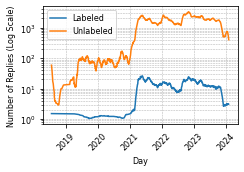

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Example DataFrames
df1 = df.copy()
df2 = remaining_df.copy()

# Convert Unix timestamps to datetime
df1['replyDate'] = pd.to_datetime(df1['replyDate'], unit='s')
df2['replyDate'] = pd.to_datetime(df2['replyDate'], unit='s')

# Count replies per day
df1_daily = df1.groupby(df1['replyDate'].dt.date).size()
df2_daily = df2.groupby(df2['replyDate'].dt.date).size()

# Apply Savitzky-Golay filter to smooth the data
window_length = 31  # Window length (must be odd)
polyorder = 1  # Polynomial order
df1_daily_smoothed = savgol_filter(df1_daily, window_length, polyorder, mode='nearest')
df2_daily_smoothed = savgol_filter(df2_daily, window_length, polyorder, mode='nearest')

# Create the plot
plt.figure(figsize=(3.5, 2.5))
plt.plot(df1_daily.index, df1_daily_smoothed, label='Labeled')
plt.plot(df2_daily.index, df2_daily_smoothed, label='Unlabeled')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Day', fontsize=8)
plt.ylabel('Number of Replies (Log Scale)', fontsize=8)
plt.legend(loc='upper left', fontsize=8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

plt.savefig('/home/ravi/raviProject/CountVsYear.png', format='png', dpi=1200, bbox_inches='tight')

# Show the plot
plt.show()

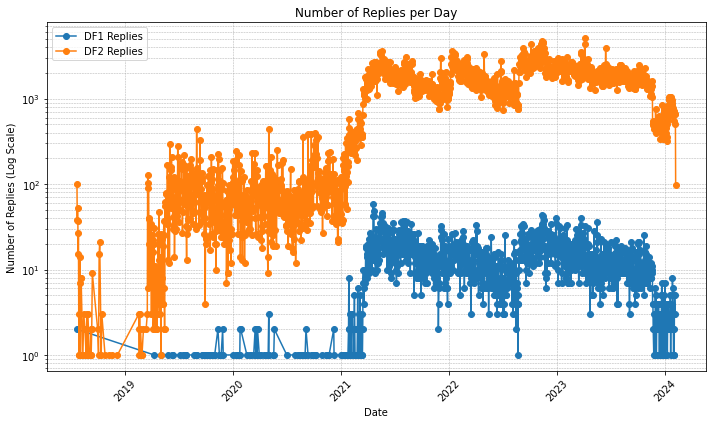

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrames with Unix timestamps
# df1 = pd.DataFrame({'replyDate': [1687098753, ...], 'reply': [...]})
# df2 = pd.DataFrame({'replyDate': [1687098753, ...], 'reply': [...]})

# Convert Unix timestamps to datetime
df1['replyDate'] = pd.to_datetime(df1['replyDate'], unit='s')
df2['replyDate'] = pd.to_datetime(df2['replyDate'], unit='s')

# Count replies per day
df1_daily = df1.groupby(df1['replyDate'].dt.date).size()
df2_daily = df2.groupby(df2['replyDate'].dt.date).size()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df1_daily.index, df1_daily.values, label='DF1 Replies', marker='o')
plt.plot(df2_daily.index, df2_daily.values, label='DF2 Replies', marker='o')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Date')
plt.ylabel('Number of Replies (Log Scale)')
plt.title('Number of Replies per Day')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()